# Performance comparison with Dionysus 2

This notebook contains a few synthetic benchmarks that compare the performance of my Python implementation and a C++ library that can calculate persistent topology

As expected, the Python implementation is significantly slower. However, considering the simplicity of the implementation and use of only a few arrays and mainly Python objects, an order of magnitude differerence is actually not that bad. 

After all, my goal was clarity and not performance. Try to look at the source code of Dionysus - I think that mine Python implementation is much easier to read.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import dionysus as d
from shape import PointCloud, persistent_homology

## Torus
Let us generate points uniformly from a torus + add noise
The algorithm for sampling a uniform distribution on a torus is adapted from http://alis.uniba.sk/storage/dzb/dostupne/FM/2011/2011-FM-18190/18763v1.pdf

We will be generating more and more points and comparing the time taken to build a filtration and calculate 
persistent homology.

In [2]:
def generate_torus(n_points, noise_scale=0.3):
    theta = 2*np.pi*np.random.rand(n_points)
    phi = np.pi*np.random.rand(n_points)
    u = np.random.rand(n_points)

    y = 3+np.sin(phi)
    y[u<((3-np.sin(phi))/6)]

    torus = np.stack((y*np.cos(theta), y*np.sin(theta), np.cos(phi)), axis=1)
    torus += np.random.normal(scale=noise_scale, size=(n_points , 3))
    return torus
    
torus = generate_torus(300)

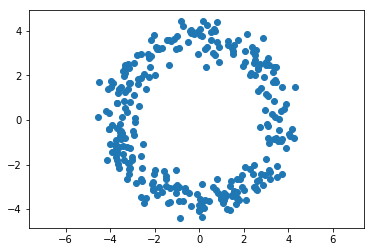

In [3]:
plt.scatter(torus[:,0], torus[:,1])
plt.axis('equal')
plt.show()

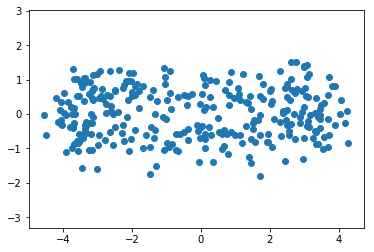

In [4]:
plt.scatter(torus[:,0], torus[:,2])
plt.axis('equal')
plt.show()

In [5]:
import time

start_index = 10
end_index = 30
eps = 0.5
dim = 3

times ={
    'mine_filtration': [],
    'mine_hom': [],
    'd_filtration': [],
    'd_hom': []
}

n_simplices = []

for i in range(start_index,end_index):
    print("Loop {}".format(i))
    n_points = i*100
    
    # Generate Torus
    torus = generate_torus(n_points)
    
    # My implementation
    
    ## Filtration
    t0 = time.time()
    pc = PointCloud(torus)
    filtration = pc.filtration(eps, dim)
    t1 = time.time()
    times['mine_filtration'].append(t1-t0)
    n_simplices.append(len(filtration))
    
    ## Persistent homology calculation
    t0 = time.time()
    persistent_homology(filtration, 3)
    t1 = time.time()
    times['mine_hom'].append(t1-t0)
    
    # Dionysus
    
    ## Filtration
    t0 = time.time()
    f = d.fill_rips(torus, dim, eps)
    t1 = time.time()
    times['d_filtration'].append(t1-t0)
    
    ## Persistent homology calculation
    t0 = time.time()
    d.homology_persistence(f, prime=2)
    t1 = time.time()
    times['d_hom'].append(t1-t0)

Loop 10
Loop 11
Loop 12
Loop 13
Loop 14
Loop 15
Loop 16
Loop 17
Loop 18
Loop 19
Loop 20
Loop 21
Loop 22
Loop 23
Loop 24
Loop 25
Loop 26
Loop 27
Loop 28
Loop 29


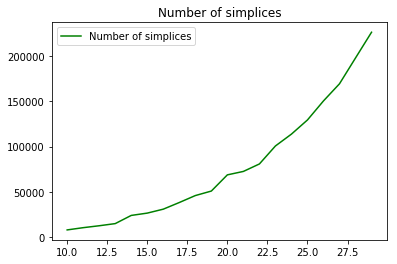

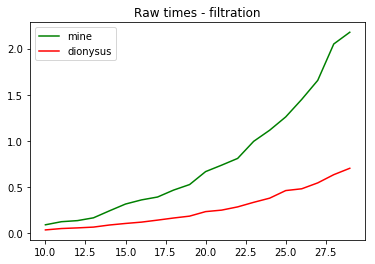

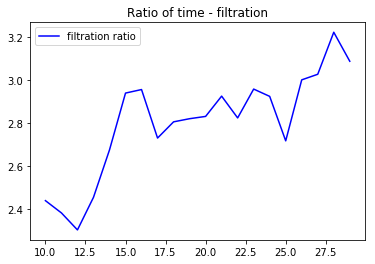

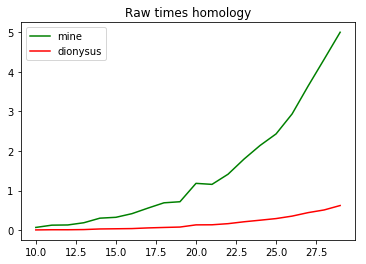

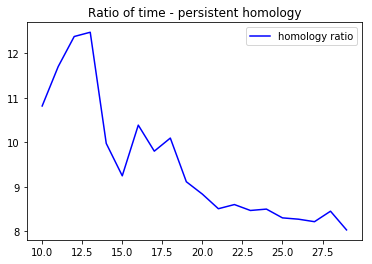

In [6]:
plt.plot(range(start_index,end_index), n_simplices, c='g', label='Number of simplices')
plt.legend()
plt.title("Number of simplices")
plt.show()

plt.plot(range(start_index,end_index), times['mine_filtration'], c='g', label='mine')
plt.plot(range(start_index,end_index), times['d_filtration'], c='r', label='dionysus')
plt.title("Raw times - filtration")
plt.legend()
plt.show()

filtration_ratio = [a/b for a,b in zip(times['mine_filtration'],times['d_filtration'])]

plt.plot(range(start_index,end_index), filtration_ratio, c='b', label='filtration ratio')
plt.title("Ratio of time - filtration")
plt.legend()
plt.show()


plt.plot(range(start_index,end_index), times['mine_hom'], c='g', label='mine')
plt.plot(range(start_index,end_index), times['d_hom'], c='r', label='dionysus')
plt.title("Raw times homology")
plt.legend()
plt.show()

hom_ratio = [a/b for a,b in zip(times['mine_hom'],times['d_hom'])]

plt.plot(range(start_index,end_index), hom_ratio, c='b', label='homology ratio')
plt.title("Ratio of time - persistent homology")
plt.legend()
plt.show()

# Random data

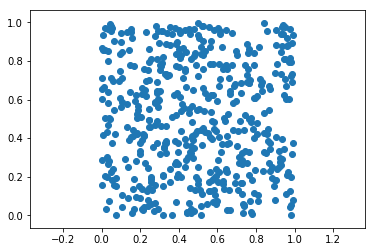

In [7]:
def generate_uniform(n_points):
    return np.random.rand(n_points, 2)
    
square = generate_uniform(500)

plt.scatter(square[:,0], square[:,1])
plt.axis('equal')
plt.show()

In [8]:
start_index = 2
end_index = 11
eps = 0.1
dim = 3

times ={
    'mine_filtration': [],
    'mine_hom': [],
    'd_filtration': [],
    'd_hom': []
}

n_simplices = []

for i in range(start_index,end_index):
    print("Loop {}".format(i))
    n_points = i*100
    
    # Generate Torus
    square = generate_uniform(n_points)
    
    # My implementation
    
    ## Filtration
    t0 = time.time()
    pc = PointCloud(square)
    filtration = pc.filtration(eps, dim)
    t1 = time.time()
    times['mine_filtration'].append(t1-t0)
    n_simplices.append(len(filtration))
    
    ## Persistent homology calculation
    t0 = time.time()
    persistent_homology(filtration, 3)
    t1 = time.time()
    times['mine_hom'].append(t1-t0)
    
    # Dionysus
    
    ## Filtration
    t0 = time.time()
    f = d.fill_rips(square, dim, eps)
    t1 = time.time()
    times['d_filtration'].append(t1-t0)
    
    ## Persistent homology calculation
    t0 = time.time()
    d.homology_persistence(f, prime=2)
    t1 = time.time()
    times['d_hom'].append(t1-t0)

Loop 2
Loop 3
Loop 4
Loop 5
Loop 6
Loop 7
Loop 8
Loop 9
Loop 10


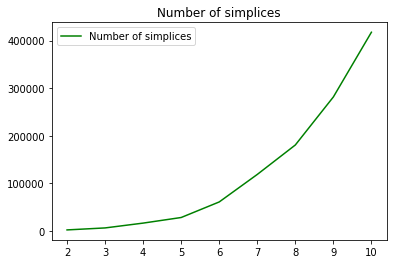

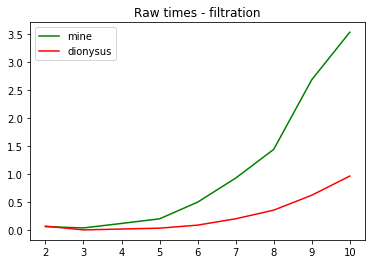

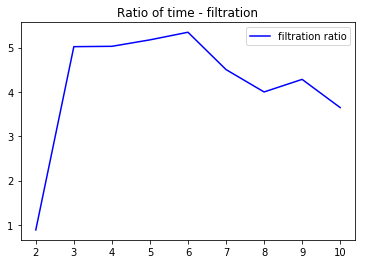

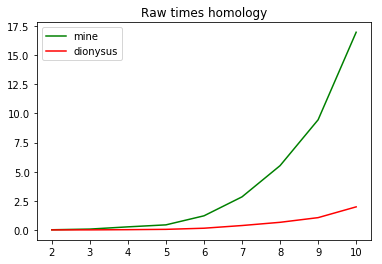

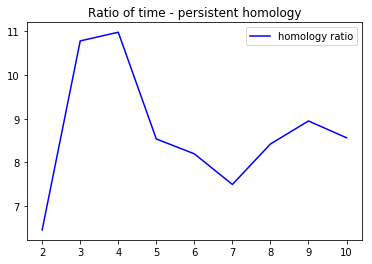

In [9]:
plt.plot(range(start_index,end_index), n_simplices, c='g', label='Number of simplices')
plt.legend()
plt.title("Number of simplices")
plt.show()

plt.plot(range(start_index,end_index), times['mine_filtration'], c='g', label='mine')
plt.plot(range(start_index,end_index), times['d_filtration'], c='r', label='dionysus')
plt.title("Raw times - filtration")
plt.legend()
plt.show()

filtration_ratio = [a/b for a,b in zip(times['mine_filtration'],times['d_filtration'])]

plt.plot(range(start_index,end_index), filtration_ratio, c='b', label='filtration ratio')
plt.title("Ratio of time - filtration")
plt.legend()
plt.show()


plt.plot(range(start_index,end_index), times['mine_hom'], c='g', label='mine')
plt.plot(range(start_index,end_index), times['d_hom'], c='r', label='dionysus')
plt.title("Raw times homology")
plt.legend()
plt.show()

hom_ratio = [a/b for a,b in zip(times['mine_hom'],times['d_hom'])]

plt.plot(range(start_index,end_index), hom_ratio, c='b', label='homology ratio')
plt.title("Ratio of time - persistent homology")
plt.legend()
plt.show()